In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('New_Emotion_Editing.csv')
data.head()

,Consent_Initial_Consent_Confirmation,Consent_1_Voluntary_Participation_Acknowledgement,Consent_2_Data_Access_Permission,Consent_3_Future_Research_Consent,Consent_4_Study_Participation_Agreement,Demographics_Department_Selected,Demographics_2_Years_At_Company_Selected,Demographics_4_Current_Role,Demographics_5_Primary_Work_Arrangement,Self-Regulations,...,Perception of EI,Perception of EI .1,Perception of EI .2,Perception of EI .3,Perception of EI .4,Training Needs,Training Needs .1,Training Needs .2,Training Needs .3,Training Needs .4
0,YES,YES,YES,YES,I agree,T&E,1-5 years,AV specialist,Other,6,...,7,6,6,7,7,3,6,2,7,7
1,YES,YES,YES,YES,I agree,Sales,5-10 years,Sales representative,Remote,6,...,7,6,6,7,6,7,7,7,7,7
2,YES,YES,YES,YES,I agree,Marketing,5-10 years,Marketing Specialist,Remote,6,...,7,6,6,7,5,7,7,7,7,7
3,YES,YES,YES,YES,I agree,Marketing,More than 10 years,Market development,Hybrid,5,...,7,7,7,7,6,7,7,7,7,7
4,YES,YES,YES,YES,I agree,Finance,More than 10 years,Principal financial analyst,Remote,6,...,5,4,4,4,5,4,4,4,4,5


In [3]:
EI_columns = ['Self-Regulations ', 'Empathy   ', 'Social Skills  ', 'Adaptability  ']

In [7]:
DV_columns = ['Productivity  ', 'Workplace Morale  ']

In [9]:
data_cleaned = data[EI_columns + DV_columns].dropna()


In [11]:
data_cleaned

,Self-Regulations,Empathy,Social Skills,Adaptability,Productivity,Workplace Morale
0,6,7,7,5,6,7
1,6,6,6,6,7,6
2,6,7,7,6,6,7
3,5,6,5,5,4,6
4,6,5,6,3,5,5
5,6,5,5,7,7,4
6,5,7,7,5,7,6
7,6,6,6,6,5,5
8,7,7,7,7,7,7
9,6,7,6,6,6,7



# 1. Linearity
- This step involves verifying that the relationships between independent variables (predictors) and the dependent variable(s) are linear.



Testing Linearity for Productivity:

Correlation Coefficients with Productivity  :
Self-Regulations : 0.15


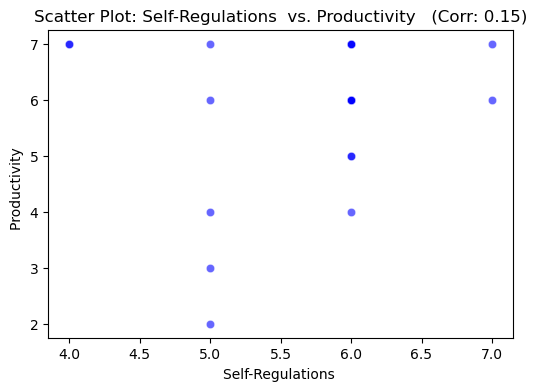

Empathy   : 0.50


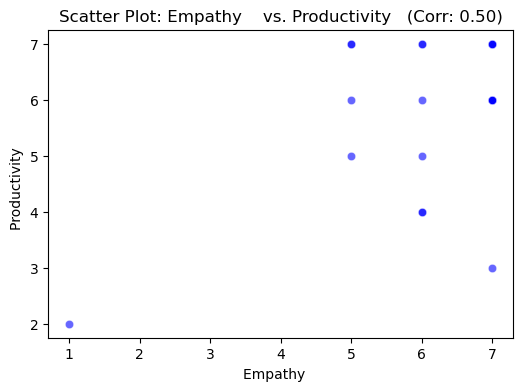

Social Skills  : 0.38


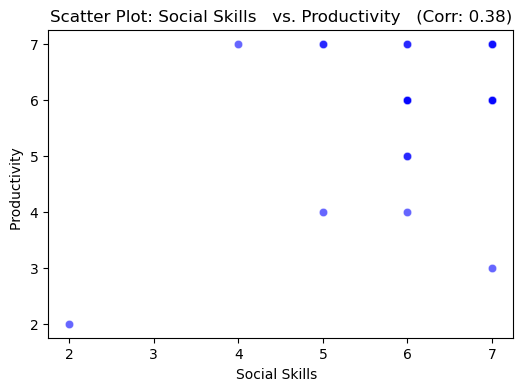

Adaptability  : 0.74


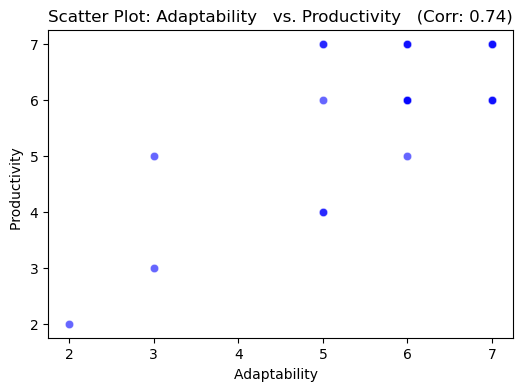


Testing Linearity for Workplace Morale:

Correlation Coefficients with Workplace Morale  :
Self-Regulations : 0.40


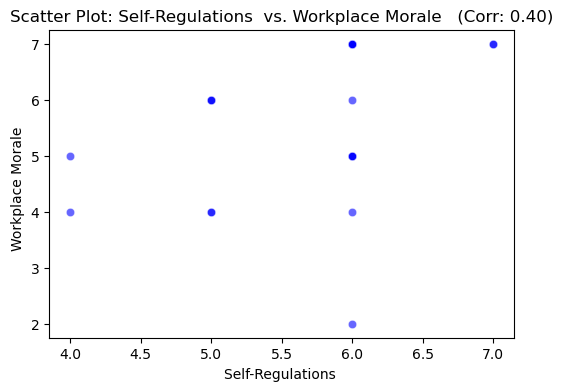

Empathy   : 0.29


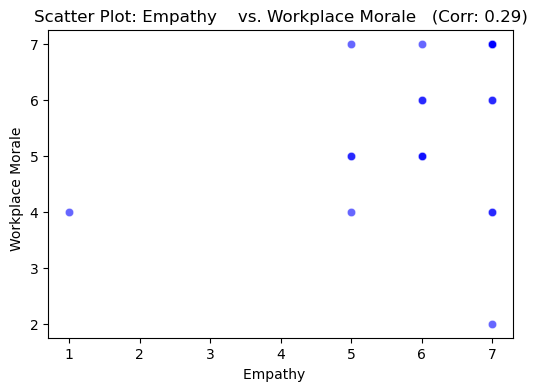

Social Skills  : 0.49


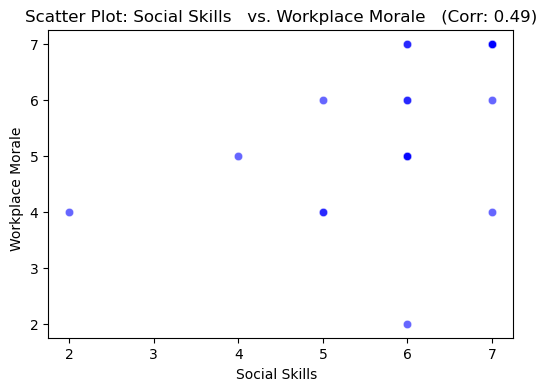

Adaptability  : 0.30


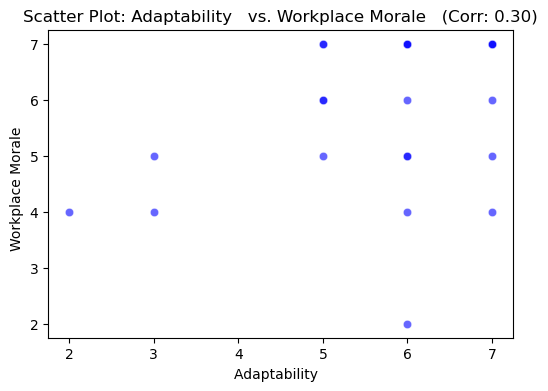

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to test linearity via scatter plots and correlation coefficients
def plot_scatter_and_correlation(dependent_var, independent_vars, data):
    print(f"\nCorrelation Coefficients with {dependent_var}:")
    for col in independent_vars:
        corr = np.corrcoef(data[dependent_var], data[col])[0, 1]  # Calculate correlation
        print(f"{col}: {corr:.2f}")  # Display correlation coefficient

        # Create scatter plot
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=data[col], y=data[dependent_var], color="blue", alpha=0.6)
        plt.title(f"Scatter Plot: {col} vs. {dependent_var} (Corr: {corr:.2f})")
        plt.xlabel(col)
        plt.ylabel(dependent_var)
        plt.show()

# Apply the function for each dependent variable
print("Testing Linearity for Productivity:")
plot_scatter_and_correlation('Productivity  ', EI_columns, data_cleaned)

print("\nTesting Linearity for Workplace Morale:")
plot_scatter_and_correlation('Workplace Morale  ', EI_columns, data_cleaned)


## Summary for Linearity Testing

- Scatter plots showed the relationship between independent variables (e.g., self-regulation, empathy) and dependent variables (e.g., productivity, workplace morale).
- Correlation coefficients provided quantitative evidence of the strength of these relationships.
- If relationships were found to be non-linear, transformations or polynomial terms may be applied.

# 2. Multicollinearity
- This step involves checking if independent variables are highly correlated with each other using Variance Inflation Factor (VIF).

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = data_cleaned[EI_columns]

X_vif = add_constant(X_vif)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]


In [16]:
vif_data

,Feature,VIF
0,const,99.988470
1,Self-Regulations,3.354021
2,Empathy,7.618367
3,Social Skills,8.082284
4,Adaptability,2.052328


### Variance Inflation Factor (VIF) Analysis

- **Constant**: High VIF (99.99) due to the intercept term; this is expected and not a concern.
- **Self-Regulations**: VIF = 3.35 (✅ Acceptable, low multicollinearity).
- **Empathy**: VIF = 7.62 (⚠️ Moderate multicollinearity; investigate further).
- **Social Skills**: VIF = 8.08 (⚠️ Moderate multicollinearity; consider combining or removing related variables).
- **Adaptability**: VIF = 2.05 (✅ Acceptable, low multicollinearity).

#### Insight:
- **Empathy** and **Social Skills** have VIF > 5, indicating moderate multicollinearity. Further investigation or dimensionality reduction may be required.
- Overall, multicollinearity is not severe but warrants attention for some variables.


## Homoscedasticity

## Fit the Regression Model

In [50]:
import statsmodels.api as sm

# Independent and dependent variables
X = data_cleaned[EI_columns]  # Independent variables
y = data_cleaned['Productivity  ']  # Dependent variable: Productivity

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Predicted values and residuals
predicted_values = model.predict(X)
residuals = model.resid


## Create Residual Plot
- A residual plot visually shows residuals on the y-axis and predicted values on the x-axis. Ideally, the residuals should be randomly scattered around 0 without any patterns.

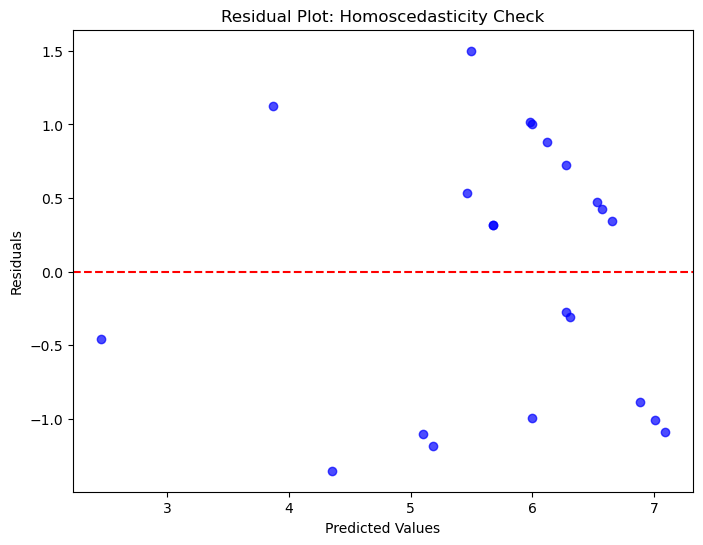

In [52]:
import matplotlib.pyplot as plt

# Plot residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.7, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)  # Horizontal line at 0
plt.title('Residual Plot: Homoscedasticity Check')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


## Perform Statistical Test for Homoscedasticity (Breusch-Pagan Test)
- In addition to visual inspection, you can conduct the Breusch-Pagan test, which statistically evaluates whether residual variance depends on the predicted values.

In [56]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X)

# Test results
bp_stat = bp_test[0]  # Test statistic
bp_p_value = bp_test[1]  # p-value

print(f"Breusch-Pagan Test Statistic: {bp_stat:.4f}")
print(f"p-value: {bp_p_value:.4f}")

# Interpretation
if bp_p_value > 0.05:
    print("Homoscedasticity assumption is met (p > 0.05).")
else:
    print("Homoscedasticity assumption is violated (p ≤ 0.05).")


Breusch-Pagan Test Statistic: 7.0310
p-value: 0.1343
Homoscedasticity assumption is met (p > 0.05).


## Apply Transformations

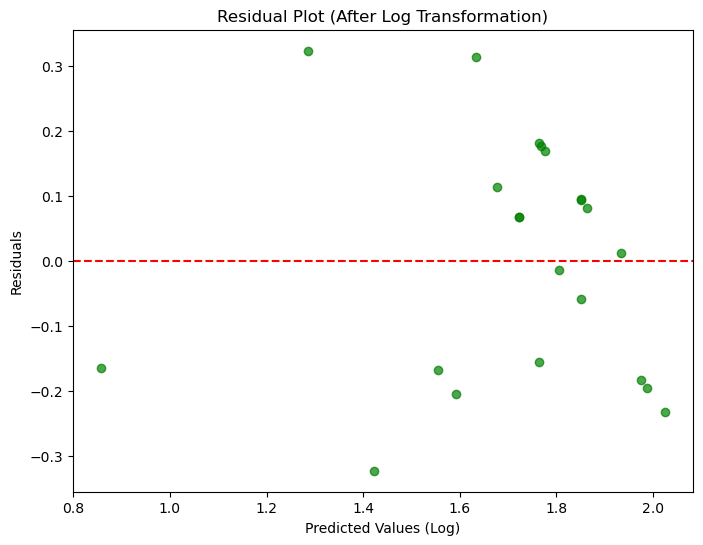

In [59]:
import numpy as np

# Apply log transformation to the dependent variable
y_log = np.log(data_cleaned['Productivity  '])

# Refit the regression model
model_log = sm.OLS(y_log, X).fit()

# Recalculate predicted values and residuals
predicted_values_log = model_log.predict(X)
residuals_log = model_log.resid

# Plot residuals vs. predicted values for the transformed model
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values_log, residuals_log, alpha=0.7, color='green')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title('Residual Plot (After Log Transformation)')
plt.xlabel('Predicted Values (Log)')
plt.ylabel('Residuals')
plt.show()


## Summary of Homoscedasticity Testing

### Visual Inspection:

- Residuals vs. Predicted Values scatter plots were created for each dependent variable.
- Random scatter around 0 indicates homoscedasticity, while patterns suggest heteroscedasticity.

### Statistical Test:

 - The Breusch-Pagan test was used to evaluate heteroscedasticity statistically.
 - p-value > 0.05 confirms homoscedasticity; p-value ≤ 0.05 indicates violations.

### Addressing Heteroscedasticity:

- Logarithmic transformations were applied to the dependent variable to stabilize residual variance.
After transformation, residual plots were re-evaluated to confirm improvements.

### (Shapiro-Wilk Test)

In [40]:
normality_results = {}
for column in EI_columns + DV_columns:
    stat, p_value = shapiro(data_cleaned[column])
    normality_results[column] = {"Statistic": stat, "p-value": p_value}
normality_results

{'Self-Regulations ': {'Statistic': 0.818373441696167,
  'p-value': 0.0009842676809057593},
 'Empathy   ': {'Statistic': 0.6625155210494995,
  'p-value': 6.768646017007995e-06},
 'Social Skills  ': {'Statistic': 0.7704041004180908,
  'p-value': 0.00017837714403867722},
 'Adaptability  ': {'Statistic': 0.8299300670623779,
  'p-value': 0.0015300688100978732},
 'Productivity  ': {'Statistic': 0.8069303631782532,
  'p-value': 0.0006435800460167229},
 'Workplace Morale  ': {'Statistic': 0.8627480864524841,
  'p-value': 0.005753571633249521}}

In [ ]:
Independent Variables:
Self-Regulation:
p-value = 0.00098 (≤ 0.05) → Does not follow a normal distribution.
Empathy:
p-value = 6.77e-06 (≤ 0.05) → Does not follow a normal distribution.
Social Skills:
p-value = 0.00018 (≤ 0.05) → Does not follow a normal distribution.
Adaptability:
p-value = 0.00153 (≤ 0.05) → Does not follow a normal distribution.
Dependent Variables:
Productivity:
p-value = 0.00064 (≤ 0.05) → Does not follow a normal distribution.
Workplace Morale:
p-value = 0.00575 (≤ 0.05) → Does not follow a normal distribution.

- if p-value > 0.05:
    - The data follow normal distributions
- If p-value ≤ 0.05:
    - The data does not follow normal distributions

## Fit the Regression Model Using Productivity as the Dependent Variable
- Your independent variables (EI_columns) and dependent variable (Productivity) will be used here. Residuals will be extracted after fitting the model.

In [17]:
import statsmodels.api as sm

# Independent and dependent variables
X = data_cleaned[EI_columns]  # Independent variables (EI constructs)
y = data_cleaned['Productivity  ']  # Dependent variable: Productivity

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Extract residuals
residuals = model.resid

# Print model summary for reference (optional)
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Productivity     R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     6.395
Date:                Sat, 04 Jan 2025   Prob (F-statistic):            0.00249
Time:                        23:46:21   Log-Likelihood:                -28.194
No. Observations:                  22   AIC:                             66.39
Df Residuals:                      17   BIC:                             71.84
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.5438      2.11

## Perform Shapiro-Wilk Test on Residuals
- test the normality of the residuals

In [19]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test on residuals
stat, p_value = shapiro(residuals)

# Print test results
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}, p-value: {p_value:.4f}")

# Interpretation of results
if p_value > 0.05:
    print("Residuals follow a normal distribution (p > 0.05).")
else:
    print("Residuals do NOT follow a normal distribution (p ≤ 0.05).")


Shapiro-Wilk Test Statistic: 0.9218, p-value: 0.0829
Residuals follow a normal distribution (p > 0.05).


## Generate Q-Q Plot for Residuals
- This visual check will show whether the residuals deviate from a theoretical normal distribution.

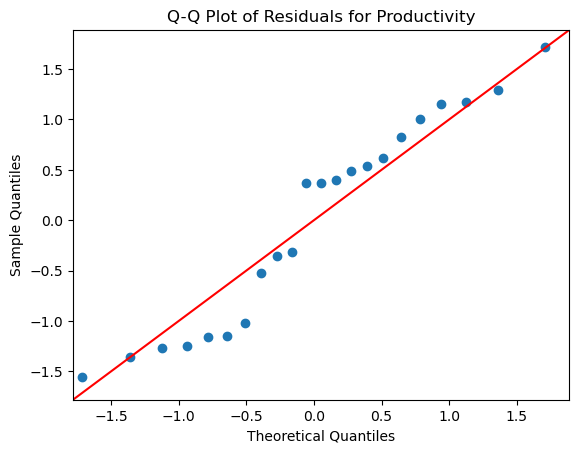

In [21]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate Q-Q plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals for Productivity")
plt.show()


## Logarithmic Transformation
- p-value for the Shapiro-Wilk test indicates non-normality for most variables, you can apply a log transformation to the dependent variable (Productivity) and refit the regression model.

Shapiro-Wilk Test (Log): Statistic = 0.9506, p-value = 0.3242


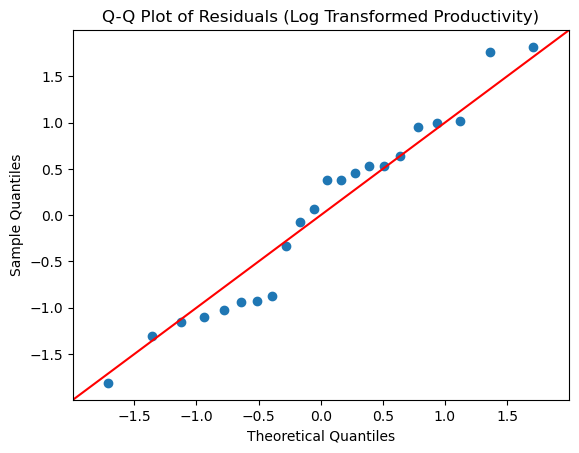

In [23]:
import numpy as np

# Apply log transformation to the dependent variable
y_log = np.log(data_cleaned['Productivity  '])

# Refit the regression model using the transformed dependent variable
model_log = sm.OLS(y_log, X).fit()

# Extract residuals from the new model
residuals_log = model_log.resid

# Perform Shapiro-Wilk test on the transformed residuals
stat_log, p_value_log = shapiro(residuals_log)

# Print test results
print(f"Shapiro-Wilk Test (Log): Statistic = {stat_log:.4f}, p-value = {p_value_log:.4f}")

# Generate Q-Q plot for the transformed residuals
sm.qqplot(residuals_log, line='45', fit=True)
plt.title("Q-Q Plot of Residuals (Log Transformed Productivity)")
plt.show()


## Other Dependent Variables  'Workplace Morale' 

Shapiro-Wilk Test for Morale: Statistic = 0.9359, p-value = 0.1629


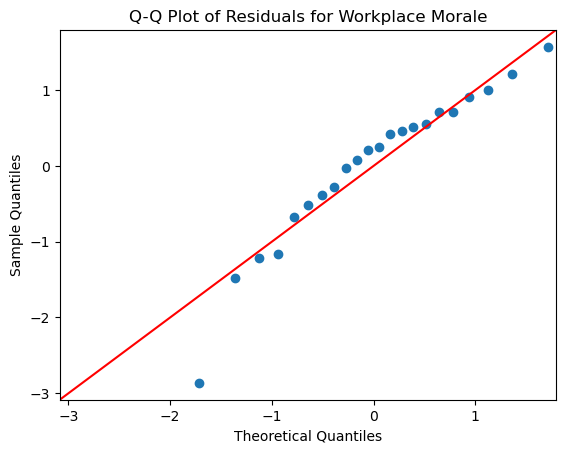

In [30]:
# For Workplace Morale
y_morale = data_cleaned['Workplace Morale  ']

# Fit regression model
model_morale = sm.OLS(y_morale, X).fit()
residuals_morale = model_morale.resid

# Shapiro-Wilk test
stat_morale, p_value_morale = shapiro(residuals_morale)
print(f"Shapiro-Wilk Test for Morale: Statistic = {stat_morale:.4f}, p-value = {p_value_morale:.4f}")

# Q-Q plot
sm.qqplot(residuals_morale, line='45', fit=True)
plt.title("Q-Q Plot of Residuals for Workplace Morale")
plt.show()


In [80]:
df=pd.read_csv("New_Emotion_Editing.csv")


In [82]:
iv_columns = [
    'Self-Regulations ', 'Self-Regulations .1', 'Self-Regulations .2', 'Self-Regulations .3', 'Self-Regulations .4',
    'Empathy   ', 'Empathy   .1', 'Empathy   .2', 'Empathy   .3', 'Empathy   .4',
    'Social Skills  ', 'Social Skills  .1', 'Social Skills  .2', 'Social Skills  .3', 'Social Skills  .4',
    'Adaptability  ', 'Adaptability  .1', 'Adaptability  .2', 'Adaptability  .3', 'Adaptability  .4'
]

dv_columns = [
    'Productivity  ', 'Productivity  .1', 'Productivity  .2', 'Productivity  .3', 'Productivity  .4',
    'Workplace Morale  ', 'Workplace Morale  .1', 'Workplace Morale  .2', 'Workplace Morale  .3', 'Workplace Morale  .4',
    'Collaboration  ', 'Collaboration  .1', 'Collaboration  .2', 'Collaboration  .3', 'Collaboration  .4'
]

In [84]:
iv_df = df[iv_columns]
dv_df = df[dv_columns]

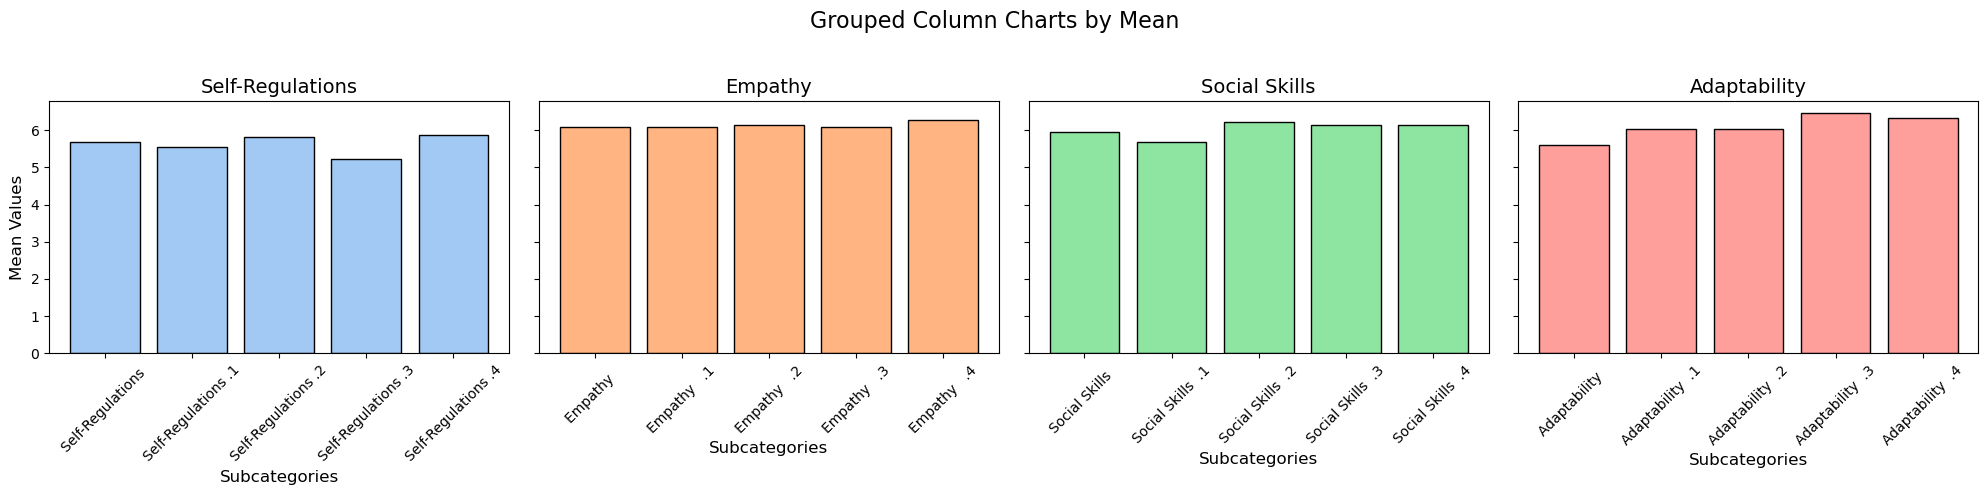

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to create grouped column charts for all EI constructs
def plot_combined_column_charts_static(df, groups, statistic='mean', title="Grouped Column Charts"):
    # Prepare the data for each group
    group_stats = {}
    for group, columns in groups.items():
        if statistic == 'mean':
            group_stats[group] = [df[col].mean() for col in columns]
        elif statistic == 'median':
            group_stats[group] = [df[col].median() for col in columns]
        elif statistic == 'sum':
            group_stats[group] = [df[col].sum() for col in columns]
        else:
            raise ValueError(f"Statistic '{statistic}' not supported.")
    
    # Create a figure and axis
    n_groups = len(groups)
    fig, axes = plt.subplots(1, n_groups, figsize=(5 * n_groups, 5), sharey=True)
    
    # Define a list of colors
    colors = sns.color_palette('pastel', n_colors=n_groups)
    
    # Plot each group as a bar chart
    for i, (group, stats) in enumerate(group_stats.items()):
        axes[i].bar(groups[group], stats, color=colors[i], edgecolor='black')
        axes[i].set_title(group, fontsize=14)
        axes[i].set_xlabel("Subcategories", fontsize=12)
        if i == 0:
            axes[i].set_ylabel(f"{statistic.capitalize()} Values", fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)
    
    # Set the overall title
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Show the plot
    plt.show()

# Example usage: Group columns by their prefixes
groups = {
    "Self-Regulations": [col for col in iv_df.columns if "Self-Regulations" in col],
    "Empathy": [col for col in iv_df.columns if "Empathy" in col],
    "Social Skills": [col for col in iv_df.columns if "Social Skills" in col],
    "Adaptability": [col for col in iv_df.columns if "Adaptability" in col]
}

# Call the function to plot the grouped column charts
plot_combined_column_charts_static(iv_df, groups, statistic='mean', title="Grouped Column Charts by Mean")